In [30]:
import numpy as np
from sklearn import svm
from sklearn.datasets import load_iris
from sklearn.metrics import auc, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize


iris = load_iris()
X = iris.data
y = iris.target
# 输出二值化
y = label_binarize(y, classes=[0,1,2])
n_classes = y.shape[1]
# 增加噪音特征 ,不增加会导致 ROC 曲线很平缓
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]
#分割数据集
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=.3,random_state=0)
# 学习，预测
classifier = OneVsRestClassifier(svm.SVC(kernel='linear',probability=True))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)
# 计算每个类别的ROC曲线和AUC面积
fpr = dict()
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_score[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])



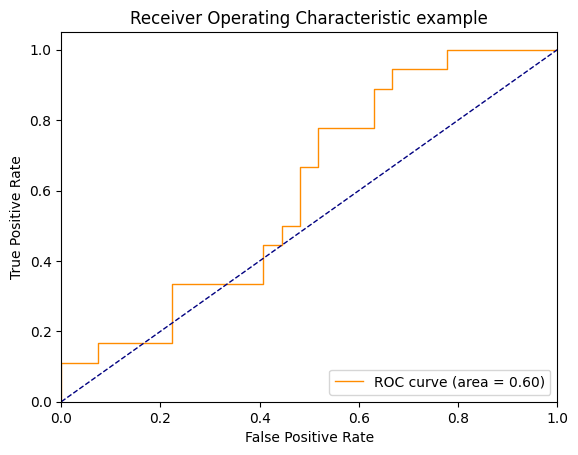

In [32]:
from matplotlib import pyplot as plt

plt.figure()
lw = 1
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic example')
plt.legend(loc="lower right")
plt.show()